<figure>
  <IMG SRC="https://www.colorado.edu/cs/profiles/express/themes/cuspirit/logo.png" WIDTH=50 ALIGN="right">
</figure>
# The Central Limit Theorem
*CSCI 3022 - Dirk Grunwald*

The Central Limit Theorem (CLT) is one of the more well known theorems of statistics. The CLT basically implies that many quantities will tend to have a normal distribution in practice. This is particularly true for _measurement error_ or the variance that arises during measurement.

Because quanities like measurement error follow a normal distribution, we can use the CLT to determine the uncertainty in our measured data and, conversely, how many measurements are needed to achieve a particular certainty.

First, some preliminaries

In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

Let's briefly review the Weak Law of Large Numbers, mainly to the recall the notation for the likelihood of samples to be a certain distance from the mean.

## Reviewing The Weak Law
Assume we have some event $X$ that occurs with probability $p$. We conduct a series of $n$ independent measurements $S_n$ of the occurance of an event. Our estimate for $p$ is $\frac{S_n}{n}$. 

The weak law states:

$$P\left[ | \frac{S_n}{n} -p | \geq \delta \right] \leq \frac{p(1-p)}{n \delta^2} $$

Lets's remind ourselves of how to read this "The probability of our estimate being more than $\delta$ from the true probabilty $p$ is less then or equal to $\frac{p(1-p)}{n \delta^2}$".

Since we can vary $n$, we can make the right hand side arbitrarily small. Likewise, given a fixed number of measurements ($n$), we can determine $\delta$, the uncertainity in the estimate.

# The Standard Normal PDF

We're used to seeing the Normal distribution PDF, or the familar"bell curve" shape shown below.

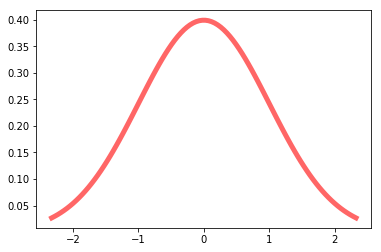

In [2]:
xp = np.linspace(norm.ppf(0.01),norm.ppf(0.99), 100)
plt.plot(xp, norm.pdf(xp),'r-', lw=5, alpha=0.6, label='norm pdf')
plt.show()

In the CLT, we will be using the cummulative probability less than or equal to a given location, $x$. For example, the shaded area in the following diagram is the cummulative probability of for $ \leq x $.

In [3]:
x = 1.0

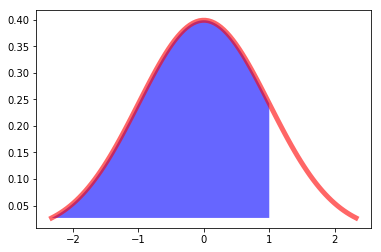

In [4]:
xp = np.linspace(norm.ppf(0.01),norm.ppf(0.99), 100)
plt.plot(xp, norm.pdf(xp),'r-', lw=5, alpha=0.6, label='norm pdf')
x2 = np.linspace(norm.ppf(0.01),1.0, 100)
plt.fill_between(x2, min(norm.pdf(x2)), norm.pdf(x2),facecolor='blue', alpha=0.6)
plt.show()

# The Normal CDF
The CLT will make use of the CDF or commulative distribution function for the normal and, in particular, the CDF of the _standard normal_, which has $\mu=0, \sigma=1$. In most texts, this will be denoted $\phi(x)$.

For example, the following shows the CDF and shows $\phi$(x), the value the probability $\leq x$. 

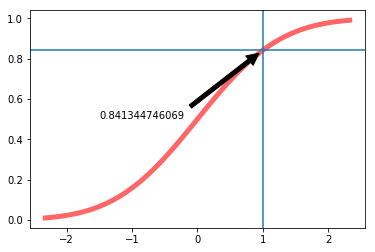

In [5]:
xp = np.linspace(norm.ppf(0.01),norm.ppf(0.99), 100)
plt.plot(xp, norm.cdf(xp),'r-', lw=5, alpha=0.6, label='norm CDF')
plt.axvline(x=1)
plt.axhline(y=norm.cdf(x))
plt.annotate(norm.cdf(x), xy=(x, norm.cdf(x)), xytext=(-1.5, 0.5),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
plt.show()

If we want to compute the probability of values between $x$ and $y$, we would compute $\phi(y) - \phi(x)$ where $y \geq x$. For example,

In [6]:
y = 1.5

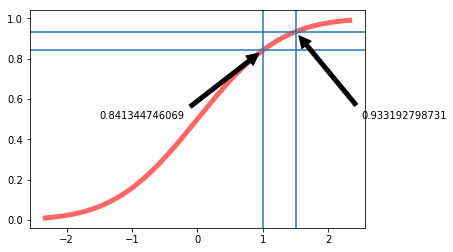

In [7]:
xp = np.linspace(norm.ppf(0.01),norm.ppf(0.99), 100)
plt.plot(xp, norm.cdf(xp),'r-', lw=5, alpha=0.6, label='norm CDF')
plt.axvline(x=x), plt.axhline(y=norm.cdf(x))
plt.axvline(x=y), plt.axhline(y=norm.cdf(y))
plt.annotate(norm.cdf(x), xy=(x, norm.cdf(x)), xytext=(-1.5, 0.5),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
plt.annotate(norm.cdf(y), xy=(y, norm.cdf(y)), xytext=(2.5, 0.5),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
plt.show()

The $\phi(y) - \phi(x)$ is about 9.2%

In [8]:
print( norm.cdf(y) - norm.cdf(x) )

0.0918480526626


## And Finally, the Central Limit Theorem

Suppose $X_1, X_2, \ldots, X_n$ are $n$ identical, independent R.V.s with a mean $\mu$ and variance $\sigma^2$.

Let $S_n = X_1 + X_2 + \ldots + X_n$.

Then, for each $x < y$, $$\lim_{n \rightarrow \infty} P\left[ x \leq \frac{S_n - n\mu}{\sigma \sqrt n} \leq y \right] = \phi(y) - \phi(x)$$

In other words, regardless of the underlying distribution of $X_i$, $S_n \sim N(n\mu, n\sigma^2)$ for some sufficiently large $n$.

## What does this mean?

If I take lots of samples from a single *e.g.* exponential distribution, they do _not_ approach the standard normal.

But, if I take samples from the sum of _many_ R.V.'s, it does -- _e.g._ your height depends on your diet, local gravity, illness you experienced, etc. Thus, height is likely normally distributed as are "errors in measurement"

## Can this really be true?
Let's evaluate this experimentally. We're going to draw X1, a small number of samples from the uniform distribution. We'll plot that, and then draw another random sample X2. We'll then add X1 and X2 and plot that.

X1 is [ 0.70025951  0.37218202  0.08640838  0.40378975] ...
X1 + X2 is [ 1.34922501  0.86646911  0.20077948  0.40483999] ...


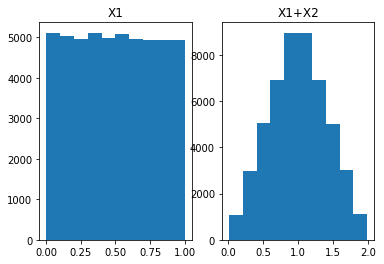

In [36]:
k = 50000
X1 = np.random.uniform(size=k)
X2 = np.random.uniform(size=k)
print('X1 is', X1[1:5], '...')
print('X1 + X2 is', (X1+X2)[1:5], '...')
plt.subplot(1,2,1), plt.hist(X1), plt.title('X1')
plt.subplot(1,2,2), plt.hist(X1+X2), plt.title('X1+X2')
plt.show()

This doesn't look very compelling because we we are only adding two uniformly distributed variables. Let's increase the number of variables to _vars_ and use Python __comprehension__ notation to generate the $X_1 + X_2 + \ldots + X_{vars}$ and plot that.

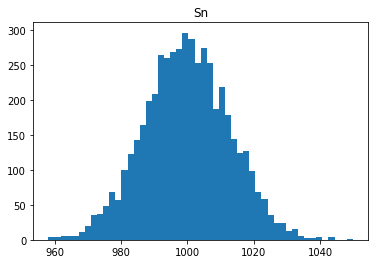

In [42]:
k, vars = 5000, 2000
Sn = sum( [np.random.uniform(size=k) for x in range(vars)])
plt.hist(Sn,bins=50), plt.title('Sn')
plt.show()

What about other distributions? Let's try the exponential distribution. We'll see that it takes more variables $X_1, X_2, \ldots$ to achieve a symmetrical shape for this highly skewed distribution, but it does approximate the normal with enough terms.

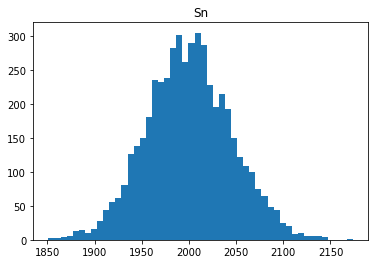

In [49]:
k,vars = 5000, 2000
Sn = sum( [np.random.exponential(size=k) for x in range(vars)])
plt.hist(Sn,bins=50), plt.title('Sn')
plt.show()

## How to "read" the CLT

Determine $x$ and $y$ such that 95% of the probability mass falls between $x$ and $y$.

In [12]:
print('2.5% of probability is lower than ', norm.ppf(0.025))
print('2.5% of probability is higher than ', norm.ppf(0.975))

2.5% of probability is lower than  -1.95996398454
2.5% of probability is higher than  1.95996398454


$$\lim_{n \rightarrow \infty} P\left[ x \leq \frac{S_n - n\mu}{\sigma \sqrt n} \leq y \right] = \phi(y) - \phi(x)$$

$$\lim_{n \rightarrow \infty} P\left[ x \leq \frac{S_n - n\mu}{\sigma \sqrt n} \leq y \right] = 0.975-0.025$$

$$\lim_{n \rightarrow \infty} P\left[ -1.96 \leq \frac{S_n - n\mu}{\sigma \sqrt n} \leq 1.96 \right] = 0.975-0.025 = 0.95$$

Or, visually...

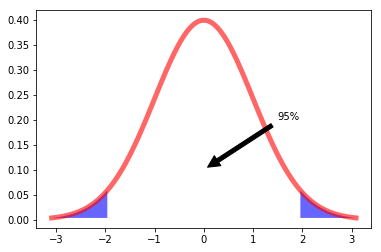

In [13]:
xp = np.linspace(norm.ppf(0.001),norm.ppf(0.999), 100)
plt.plot(xp, norm.pdf(xp),'r-', lw=5, alpha=0.6, label='norm pdf')
x2 = np.linspace(norm.ppf(0.001),norm.ppf(0.025), 100)
plt.fill_between(x2, min(norm.pdf(x2)), norm.pdf(x2),facecolor='blue', alpha=0.6)
x2 = np.linspace(norm.ppf(0.975),norm.ppf(0.999), 100)
plt.fill_between(x2, min(norm.pdf(x2)), norm.pdf(x2),facecolor='blue', alpha=0.6)
plt.annotate('95%', xy=(0,0.10), xytext=(1.5, 0.20),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
plt.show()

## One-sided CLT

The one-sided relationship is an obvious special case because $\phi(-\infty)$ = 0

$$\lim_{n \rightarrow \infty} P\left[ x \leq \frac{S_n - n\mu}{\sigma \sqrt n} \leq y \right] = \phi(y) - \phi(x)$$

$$\lim_{n \rightarrow \infty} P\left[ -\infty \leq \frac{S_n - n\mu}{\sigma \sqrt n} \leq y \right] = \phi(y) - \phi(-\infty)$$

$$\lim_{n \rightarrow \infty} P\left[  \frac{S_n - n\mu}{\sigma \sqrt n} \leq y \right] = \phi(y) - 0$$

## But wait, it get's better!

The terms of $S_n$ don't even have to have the same distribution within some resonable constraints. This means we can use the CLT to estimate the occurance of events, much as we did with the Weak Law.

$$lim_{n\rightarrow \infty} P\left[ x \leq \frac{S_n - E[S_n]}{\sqrt{Var[S_n]}} \leq y \right] = \phi(y) - \phi(x) $$

This is the basis for the observation that the sum of many random variables (height, IQ, grades in a large class) tend to be normally distributed.

## Limiting Samples using the CLT

Recall that a binomial distribution has mean $n p$ and variance $n p(1-p)$.

Now, consider an experiment where we determine if a sample obeys a property and we want to determine P[A] from $S_n$ much as in our application of the Weak Law.

We phrased this as $$P\left[ | \frac{S_n}{n} -p | \geq \delta \right] \leq \epsilon $$

and then approximated the $n$ needed to estimate that $S_n /n = p$ with a precision $\delta$

## Transforming to the CLT

Let $q = (1-p)$.

\begin{align}
P\left[ | \frac{S_n}{n} -p | \geq \delta \right] &= P\left[ \left| \frac{S_n}{\sqrt n} - {p \sqrt n} \right| \geq {\delta \sqrt n}\right] \\
&= P\left[ \left| \frac{S_n}{{\sqrt pq} \sqrt n} - \frac{p \sqrt n}{{\sqrt pq}} \right| \geq \frac{\delta \sqrt n}{{\sqrt pq}}\right] \\
&= P\left[ \left| \frac{S_n}{{\sqrt pq} \sqrt n} - \frac{{\sqrt n}\times p \sqrt n}{{{\sqrt n} \times\sqrt pq}} \right| \geq \frac{\delta \sqrt n}{{\sqrt pq}}\right]
\end{align}

\begin{align}
P\left[ | \frac{S_n}{n} -p | \geq \delta \right] 
&= P\left[ \left| \frac{S_n}{{\sqrt pq} \sqrt n} - \frac{{\sqrt n}\times p \sqrt n}{{{\sqrt n} \times\sqrt pq}} \right| \geq \frac{\delta \sqrt n}{{\sqrt pq}}\right] \\
&= P\left[ \left| \frac{S_n}{\sqrt{p q n}} - \frac{n p}{\sqrt{n p q}} \right| \geq \frac{\delta \sqrt n}{{\sqrt pq}}\right] \\
&= P\left[ \left| \frac{S_n - n p}{\sqrt{p q n}} \right| \geq \frac{\delta \sqrt n}{{\sqrt pq}}\right] \\
\end{align}
We now have a bound we can set equal to $\Phi$

We then break the absolute value in a "left" and "right" side.

$P\left[ | \frac{S_n}{n} -p | \geq \delta \right] = P\left[ \frac{S_n - n p}{\sqrt{p q n}} \leq - \frac{\delta \sqrt n}{{\sqrt pq}}\right] + P\left[ \frac{S_n - n p}{\sqrt{p q n}} \geq \frac{\delta \sqrt n}{{\sqrt pq}}\right]$

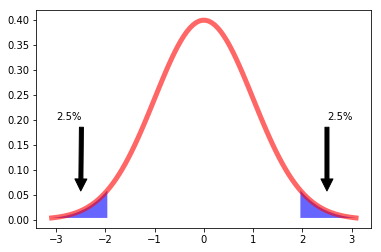

In [14]:
xp = np.linspace(norm.ppf(0.001),norm.ppf(0.999), 100)
plt.plot(xp, norm.pdf(xp),'r-', lw=5, alpha=0.6, label='norm pdf')
x2 = np.linspace(norm.ppf(0.001),norm.ppf(0.025), 100)
plt.fill_between(x2, min(norm.pdf(x2)), norm.pdf(x2),facecolor='blue', alpha=0.6)
x2 = np.linspace(norm.ppf(0.975),norm.ppf(0.999), 100)
plt.fill_between(x2, min(norm.pdf(x2)), norm.pdf(x2),facecolor='blue', alpha=0.6)
plt.annotate('2.5%', xy=(-2.5,0.05), xytext=(-3, 0.20),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
plt.annotate('2.5%', xy=(2.5,0.05), xytext=(2.5, 0.20),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
plt.show()

So, we can conclude

\begin{align}
P\left[ | \frac{S_n}{n} -p | \geq \delta \right] &= \phi( - \frac{\delta \sqrt{n}}{\sqrt{p q}}) + 1 - \phi(\frac{+ \delta \sqrt{n}}{\sqrt{p q}}) \\
&= 2\left( 1 - \phi(\frac{\delta \sqrt{n}}{\sqrt{p q}}) \right)
\end{align}



Now we rewrite this as the _error bound_ $e$ we're willing to tolerate:
$$ 2\left( 1 - \phi(\frac{\delta \sqrt{n}}{\sqrt{p q}}) \right) = \epsilon $$

$$ \phi(r) = (2 - \epsilon)/2$$

where $$r = \frac{\delta \sqrt n}{\sqrt{p q}}$$

## Applying the CLT
We saw that $$ \phi(r) = (2 - \epsilon)/2$$
Now, we look up the value of $r$ that makes this equation hold:
$$ r = \phi^{-1}(\frac{2 - \epsilon}{2})$$

_e.g._ for $e=0.05$ (_i.e._ we can be wrong 5% of the time..), $r = \phi^{-1}((2-0.05)/2)=1.96$


In [15]:
norm.ppf( (2-0.05)/2)

1.959963984540054


The definition of $r$ now yields the following estimate for $n$

$$ n = \frac{r^2 p q}{\delta^2} \leq \frac{r^2}{4 \delta^2} $$
because $pq$ is maximal at $p = 1/2$.

## Example: Estimating Needed Samples

Same problem as before. We're trying to estimate $$ P\left[\right| \frac{S_n}{n} − p \left| \geq 0.1 \right]≤0.05$$

Earlier, we found we'd need to do $n=500$ measurements or, with a more accurate estimate of $p$, we'd need $n=320$ measurements.

For $\epsilon = 0.05$, we find that $r = 1.96$.

If we have no idea what $p$ might be, we use the worse case estimate
$$ n = \frac{r^2 p q}{\delta^2} = \frac{r^2}{4 \delta^2} = \frac{1.96^2}{4 \times 0.1^2} = 96 $$

If, as before, we estimate that $p$ may be close to 0.2, we use $$ n = \frac{r^2 p q}{\delta^2} = \frac{r^2 * 0.2 * 0.8}{\delta^2} = \frac{1.96^2 * 0.2 * 0.8}{0.1^2} = 62$$

This is significantly better than the estimates of 500 and 320 measurements needed using the Weak Law.

## Example: Estimating uncertainity given a specific number of samples

Assume we've made 500 observations to estimate $p$ and let $\epsilon = 0.05$ (_i.e._ we're willing to have our estimate of the uncertainity be wrong 5% of the time).

What's the maximum error $\delta$ we would see at the 5% uncertainity level?

As before, $\epsilon=0.05$ implies that $r=1.96$ _i.e._ $\phi^{-1}( \frac{2-0.05}{2}$ )

Then, $$ \delta = \frac{ r \times \sqrt{pq}}{\sqrt n} = \frac{1.96 \sqrt{pq}}{\sqrt{n}} = \frac{1.96}{4 \sqrt{500}} = 0.022$$

Thus, at $n=96$ measurements, we had a 95% chance of being with 0.1 of the true mean, and if we continued to $n=500$ measurements, we had a 95% chance of being within 0.022 of the true mean.

## What's next?

The CLT allows us to use the normal distribution to estimate the number of samples $n$ needed to measure means or probabilities with a specified precision.

This is is the basis for the *confidence interval* and *hypothesis testing*.

There are other robust methods for estimating the precision of measured data based on *resampling* that do not depend on the CLT and the assumption of normality of data. We'll also cover those.